<a href="https://colab.research.google.com/github/joserobertofox/datascience/blob/main/MVP2_DL_Vis%C3%A3o_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Machine Learning & Analytics - Deep Learning - Visão Computacional**
## **Aluno: José Roberto Assis Silva**

## **1. Definição do Problema**

Este conjunto de dados foi criado com a finalidade de usá-lo em um drone e mapear/detectar doenças no campo de milho. Este conjunto de dados contém 4117 imagens de folhas doentes e saudáveis, distribuidas em 1550 doentes e 2567 saudáveis. Vamos criar um modelo que consiga mapear estas imagens e classificar.


In [159]:
#Importando as bibliotecas
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
import shutil
import random
import math
import numpy as np
import zipfile
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as skm
import itertools
import numpy as np
import matplotlib.pyplot as plt
import missingno as ms # para tratamento de missings
!pip install gdown
import gdown
import os
import zipfile

In [160]:
# Configuração para tratamento de erros
import warnings
warnings.filterwarnings("ignore")

In [161]:
#Função para imprimir a Matriz de Confusão
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label real')
    plt.xlabel('Label predito')

## **2. Carga do Dataset**

Nesta etapa iremos um arquivo zipado que está no Google Drive e extrairemos a imagens de folhas doentes e folhas saudáveis. Posteriormente vamos criar um dataframe com as informações de cada imagem.

In [162]:
file_id = "1ETlFcANrOKUuTsZ_8aPuys_YUbxiXUg5"
url = f"https://drive.google.com/uc?id={file_id}"

folder_path = "./dataset"  # especifique a pasta onde baixara o arquivo
os.makedirs(folder_path, exist_ok=True) # cria a pasta de destino se necessário

output = "dataset/Corn.zip"  # especifique o nome do arquivo e a extensão do mesmo
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1ETlFcANrOKUuTsZ_8aPuys_YUbxiXUg5
To: /content/dataset/Corn.zip
100%|██████████| 39.6M/39.6M [00:00<00:00, 78.3MB/s]


'dataset/Corn.zip'

In [163]:
destination = 'dataset/images' # path onde se encontra o arquivo 'Corn.zip'

os.makedirs(destination,exist_ok=True) # cria a pasta de destino se necessário

with zipfile.ZipFile(output,'r') as zip_ref:
    zip_ref.extractall(destination)

In [164]:
path='dataset/images/Corn/diseased/' # Pasta onde estão as de imagens de folhas doentes
path1='dataset/images/Corn/healthy/' # Pasta onde estão as de imagens de folhas saudáveis
print(f"Temos um total de {len(os.listdir(path))} imagens de folhas de milho doentes para o treinamento e avaliação do modelo de deep learning")
print(f"Temos um total de {len(os.listdir(path1))} imagens de folhas de milho saudáveis para o treinamento e avaliação do modelo de deep learning")
print(f"Temos um total de {len(os.listdir(path))+len(os.listdir(path1))} imagens de folhas de milho para o treinamento e avaliação do modelo de deep learning")

Temos um total de 1550 imagens de folhas de milho doentes para o treinamento e avaliação do modelo de deep learning
Temos um total de 2567 imagens de folhas de milho saudáveis para o treinamento e avaliação do modelo de deep learning
Temos um total de 4117 imagens de folhas de milho para o treinamento e avaliação do modelo de deep learning


In [165]:
print(f"Primeiras 20 imagens de folhas de milho doentes: \n {os.listdir(path)[:20]}") # Listando as 20 primeiras imagens
print(f"Primeiras 20 imagens de folhas de milho saudáveis: \n {os.listdir(path1)[:20]}") # Listando as 20 primeiras imagens

Primeiras 20 imagens de folhas de milho doentes: 
 ['919505a0-7e06-4a89-8faf-f308bd644a6a___RS_NLB 4141.JPG', 'J_170824_1318082.jpg', 'f0b49686-1a0f-4c01-9b60-e816c513215f___RS_NLB  4506 copy.jpg', 'ea9ba5b2-e8e7-48c8-ac16-d594a9e5cc51___RS_NLB  4443 copy 2.jpg', '824f1625-2e71-4df7-ab63-e0093d9a46a0___RS_NLB 3850.JPG', 'J_170824_1318076.jpg', '31a6d935-89b5-4feb-8fc6-44300ab3639e___RS_NLB 3640.JPG', 'J_170823_1344082.jpg', '6f370eac-7a90-40a3-be93-62147f32041c___RS_NLB  4608.JPG', 'J_170824_1329572.jpg', '5fc48a9b-7aee-4262-adf3-1102e354dd61___RS_NLB 3690.JPG', 'f546ba30-4b0b-4906-a527-bb4834df87cd___RS_NLB 3558.JPG', '95786afb-4b8e-4837-a396-0157ec1a2245___RS_NLB 0767.JPG', 'bf03fb8c-faeb-46e5-afe9-227289738dc4___RS_NLB 3749.JPG', 'J_170824_1318217.jpg', 'J_170823_1343430.jpg', 'f0edc304-8a96-4b71-bf5b-2a379967ba27___RS_NLB 4018.JPG', 'J_170823_1346463.jpg', 'J_170824_1318530.jpg', 'J_170824_1331013.jpg']
Primeiras 20 imagens de folhas de milho saudáveis: 
 ['3ed3e07e-1932-4c33-9613-

In [211]:
images =os.listdir(path)

labels, heights, widths, channels, filesize, folder = [], [], [], [], [], []

# Loop que percorre cada uma das imagens de folhas doentes extraídas
for fname in images:

    labels.append("diseased")
    img_shape = mpimg.imread(path+fname).shape
    heights.append(img_shape[0])
    widths.append(img_shape[1])
    channels.append(img_shape[2])
    filesize.append(os.path.getsize(path+fname))
    folder.append(path)

# Criação do dataset
df = pd.DataFrame({'images': images, 'class': labels, 'height': heights,
                         'width': widths, 'channels': channels, 'filesize': filesize, 'folder': folder})

# Imprimindo as últimas 20 linhas do dataframe com folhas doentes
df.tail(20)

,images,class,height,width,channels,filesize,folder
1530,J_170824_13183111.jpg,diseased,256,256,3,7224,dataset/images/Corn/diseased/
1531,1f36d729-d193-4824-a159-a6085f2b7159___RS_NLB ...,diseased,256,256,3,13742,dataset/images/Corn/diseased/
1532,27fcbe5e-c444-4516-b936-c95871a2e2c4___RS_NLB ...,diseased,256,256,3,16860,dataset/images/Corn/diseased/
1533,c452d1b2-28c7-49ae-a358-2d1ed64db113___RS_NLB ...,diseased,256,256,3,13367,dataset/images/Corn/diseased/
1534,6522ad4a-5629-4510-ac5e-bf854c42d3fb___RS_NLB ...,diseased,256,256,3,14412,dataset/images/Corn/diseased/
1535,39d7cc50-1271-4196-8a7b-ac11b470fe1f___RS_NLB ...,diseased,256,256,3,12375,dataset/images/Corn/diseased/
1536,fdca88b7-bd2e-472a-b48f-7a5347d72f04___RS_NLB ...,diseased,256,256,3,10829,dataset/images/Corn/diseased/
1537,J_170823_13464612.jpg,diseased,256,256,3,6666,dataset/images/Corn/diseased/
1538,J_170824_1318255.jpg,diseased,256,256,3,6513,dataset/images/Corn/diseased/
1539,J_170824_1318074.jpg,diseased,256,256,3,8596,dataset/images/Corn/diseased/


In [212]:
labels1, heights1, widths1, channels1, filesize1, folder1 = [], [], [], [], [], []

images1 =os.listdir(path1)

# Loop que percorre cada uma das imagens de folhas saudáveis extraída
for fname in images1:

    labels1.append("healthy")
    img_shape1 = mpimg.imread(path1+fname).shape
    heights1.append(img_shape1[0])
    widths1.append(img_shape1[1])
    channels1.append(img_shape1[2])
    filesize1.append(os.path.getsize(path1+fname))
    folder1.append(path1)

# Criação do dataset
df1 = pd.DataFrame({'images': images1, 'class': labels1, 'height': heights1,
                         'width': widths1, 'channels': channels1, 'filesize': filesize1, 'folder': folder1})

# Imprimindo as últimas 20 linhas do dataframe com folhas saudáveis
df1.tail(20)

,images,class,height,width,channels,filesize,folder
2547,J_170824_13303713.jpg,healthy,256,256,3,7290,dataset/images/Corn/healthy/
2548,95a91761-f9f5-43ca-9c8f-f901c149b117___R.S_HL ...,healthy,256,256,3,13424,dataset/images/Corn/healthy/
2549,J_170824_1318387.jpg,healthy,256,256,3,6192,dataset/images/Corn/healthy/
2550,e8b34671-6d1a-40e2-a888-981c0e047b14___R.S_HL ...,healthy,256,256,3,9512,dataset/images/Corn/healthy/
2551,J_170824_13173619.jpg,healthy,256,256,3,6755,dataset/images/Corn/healthy/
2552,ad1fe4c1-9eb7-4159-968f-d2f0e85c0870___R.S_HL ...,healthy,256,256,3,10398,dataset/images/Corn/healthy/
2553,J_170824_1318294.jpg,healthy,256,256,3,7883,dataset/images/Corn/healthy/
2554,a9fb7f08-cb01-431e-ae32-cbeb1279e866___R.S_HL ...,healthy,256,256,3,12307,dataset/images/Corn/healthy/
2555,J_170824_1328276.jpg,healthy,256,256,3,6208,dataset/images/Corn/healthy/
2556,cf13f3b8-d610-4b17-ace1-07a382cb620b___R.S_HL ...,healthy,256,256,3,10714,dataset/images/Corn/healthy/


In [213]:
#Juntando os dois dataframes e imprimindo as últimas 20 linhas
df2 = pd.concat([df, df1], ignore_index = True)
df2.tail(20)

,images,class,height,width,channels,filesize,folder
4097,J_170824_13303713.jpg,healthy,256,256,3,7290,dataset/images/Corn/healthy/
4098,95a91761-f9f5-43ca-9c8f-f901c149b117___R.S_HL ...,healthy,256,256,3,13424,dataset/images/Corn/healthy/
4099,J_170824_1318387.jpg,healthy,256,256,3,6192,dataset/images/Corn/healthy/
4100,e8b34671-6d1a-40e2-a888-981c0e047b14___R.S_HL ...,healthy,256,256,3,9512,dataset/images/Corn/healthy/
4101,J_170824_13173619.jpg,healthy,256,256,3,6755,dataset/images/Corn/healthy/
4102,ad1fe4c1-9eb7-4159-968f-d2f0e85c0870___R.S_HL ...,healthy,256,256,3,10398,dataset/images/Corn/healthy/
4103,J_170824_1318294.jpg,healthy,256,256,3,7883,dataset/images/Corn/healthy/
4104,a9fb7f08-cb01-431e-ae32-cbeb1279e866___R.S_HL ...,healthy,256,256,3,12307,dataset/images/Corn/healthy/
4105,J_170824_1328276.jpg,healthy,256,256,3,6208,dataset/images/Corn/healthy/
4106,cf13f3b8-d610-4b17-ace1-07a382cb620b___R.S_HL ...,healthy,256,256,3,10714,dataset/images/Corn/healthy/


healthy     2567
diseased    1550
Name: class, dtype: int64


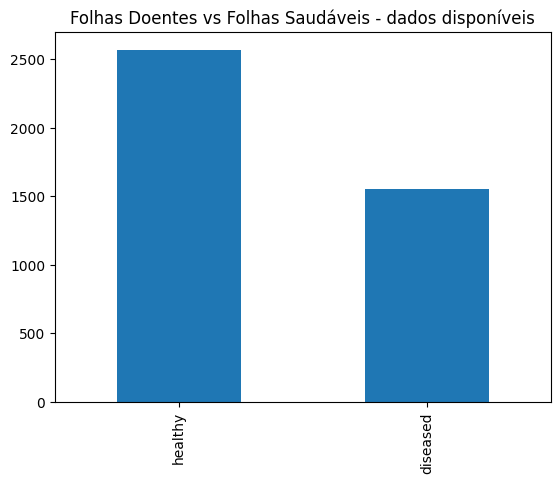

In [214]:
# Plotando gráfico de barra com as quantidades da classe target class
print((df2['class']).value_counts())
dogsVScats_count = df2['class'].value_counts().plot.bar(title='Folhas Doentes vs Folhas Saudáveis - dados disponíveis')

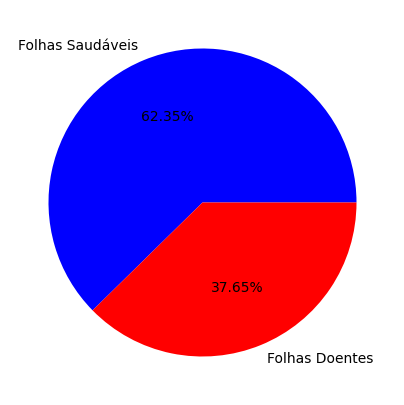

In [215]:
# Plotando gráfico de pizza com a distribuição da classe target class
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df2['class'].value_counts(),
        colors=["blue","red"],
        labels=["Folhas Saudáveis","Folhas Doentes"],
        autopct="%1.2f%%",
        )
plt.show()

Folhas Doentes


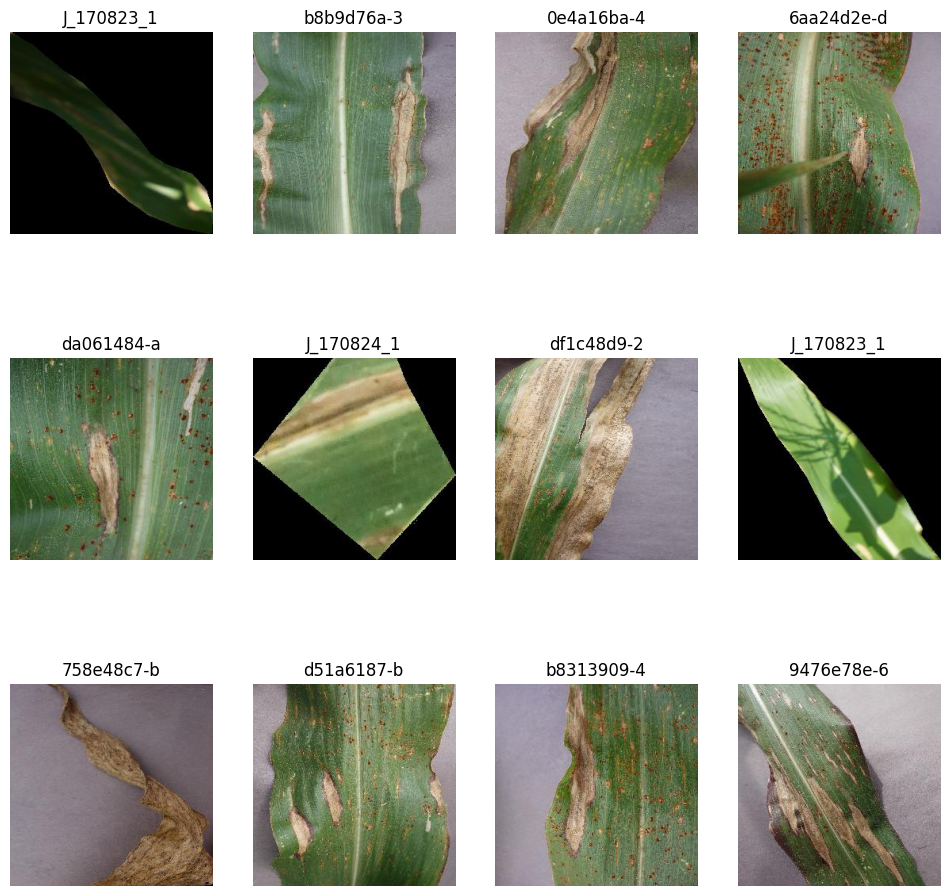

In [217]:
# Plotando 12 imagens de folhas doentes
fig = plt.gcf()
fig.set_size_inches(3*4, 3*4)

# Visualizando apenas 12 imagens
print("Folhas Doentes")
for i in range(12):

    sample = np.random.choice(images)
    img_path =path+sample
    sp = plt.subplot(3, 4, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(sample[:10])

plt.show()

Folhas Saudáveis


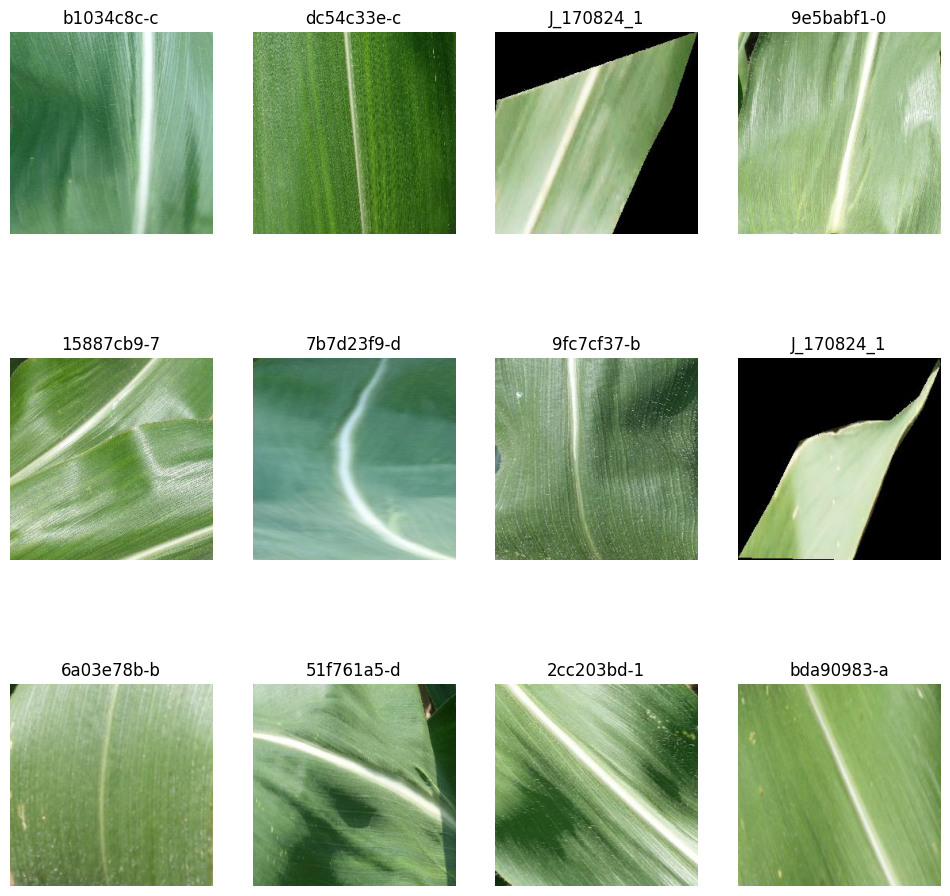

In [218]:
# Plotando 12 imagens de folhas saudáveis
fig = plt.gcf()
fig.set_size_inches(3*4, 3*4)

# Visualizando apenas 12 imagens
print("Folhas Saudáveis")
for i in range(12):

    sample = np.random.choice(images1)
    img_path =path1+sample
    sp = plt.subplot(3, 4, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(sample[:10])

plt.show()

## **3. Pré-Processamento dos Dados**

### 3.1. Separação em Conjunto de Treino e Conjunto de Teste
Vou utilizar uma técnica de amostragem usando um conjunto teste ou conjunto de validação que é uma amostra de dados que não será utilizada na construção do modelo final. Será utilizada somente no final para validar se a construção do modelo foi bem sucedida e também para termos uma análise do modelo com dados ainda não utilizados. Criarei um conjunto de dados com 80% do dataset para criarmos o modelo e guardarei 20% para teste de validação, usando a estratégia train-test-split.

In [220]:
# Separação em Conjunto Treino e Teste
train, test =train_test_split(df2[['images' , 'class', 'folder']] ,test_size=0.2 ,random_state=42 , shuffle=True)

#Visualizando a divisão dos dados

print("##### Conjunto de Treino: #####")
print(train)
print("##### Conjunto de Teste #####")
print(test)

##### Conjunto de Treino: #####
                                                 images     class  \
2077                              J_170824_13191221.jpg   healthy   
468   fda22c64-49ee-4863-a94e-6e16ca177099___RS_NLB ...  diseased   
561                                J_170823_1342045.jpg  diseased   
2251                               J_170824_1329592.jpg   healthy   
3712                               J_170824_1330529.jpg   healthy   
...                                                 ...       ...   
3444  388becdf-55dd-4fcb-a32a-b8b5e01de2f3___R.S_HL ...   healthy   
466   c3b2b118-3ee2-46cf-8c21-4d93523f4ccb___RS_NLB ...  diseased   
3092  2bc73f3d-9886-4873-8c78-835f1c219878___R.S_HL ...   healthy   
3772  3d760d50-9c32-4532-b3a0-e56066a43ef1___R.S_HL ...   healthy   
860   0c28faf9-15f7-4e78-bb72-0a1035d95f1f___RS_NLB ...  diseased   

                             folder  
2077   dataset/images/Corn/healthy/  
468   dataset/images/Corn/diseased/  
561   dataset/images/Corn

### 3.1. Preparação dos Dados
ImageDataGenerator é uma classe utilitária fornecida pelo TensorFlow para aumentar e pré-processar dados de imagens. É comumente usada em tarefas de deep learning, especialmente para classificação de imagens, para gerar imagens aumentadas (data augmentation) sob demanda durante o treinamento do modelo.

Utilizamos ainda o ImageDataGenerator para separar um conjunto de validação com 20% das amostras do conjunto de treino. É importante que o conjunto de validação não contenha as imagens de teste, tendo em vista que elas não deveriam ser conhecidas no momento do treinamento.

Veja que neste caso é usado o método flow_from_dataframe() para gerar imagens aumentadas a partir de um dataframe que aponta para as imagens originais. O método recebe parâmetros como o dataframe, o diretório com as imagens, o tamanho do lote (batch size) e o modo de classe (neste caso, binário porque são apenas duas classes), entre outros.

Importante ressaltar que o pré-processamento do teste não evolve o aumento de dados.

In [222]:
train_datagen=ImageDataGenerator(validation_split=0.2, #include validation split
                                 rescale = 1.0/255,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_dataframe(
    train , path,
    target_size=(150,150),
    batch_size=50,
    class_mode='binary',
    x_col='images',
    y_col='class',
    subset='training' #training set
    )

val_generator=train_datagen.flow_from_dataframe(
    train ,path,
    target_size=(150,150),
    batch_size=50,
    class_mode='binary',
    x_col='images',
    y_col='class',
    subset='validation' #validation set
    )

test_generator=test_datagen.flow_from_dataframe(
    test ,path,
    target_size=(150,150),
    batch_size=50,
    class_mode='binary',
    x_col='images',
    y_col='class',)

Found 972 validated image filenames belonging to 1 classes.
Found 242 validated image filenames belonging to 1 classes.
Found 336 validated image filenames belonging to 1 classes.


Found 1 validated image filenames belonging to 1 classes.


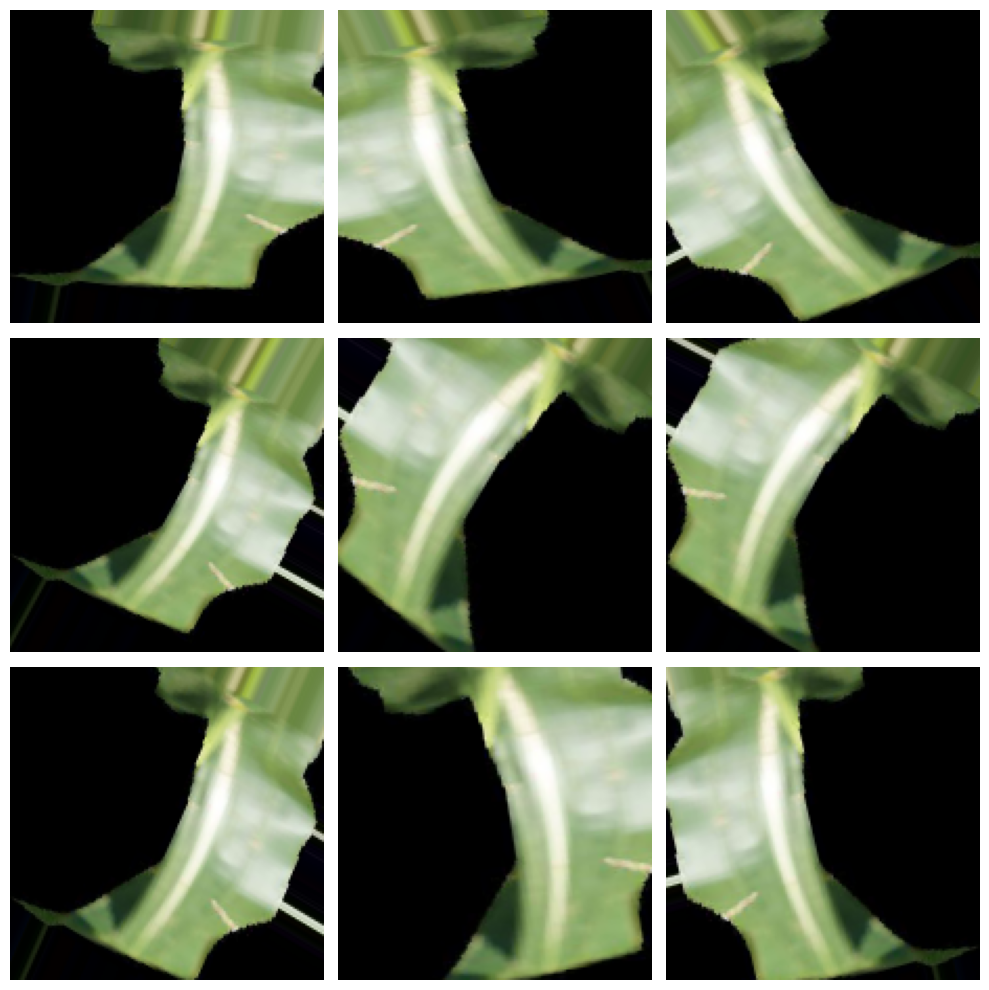

In [230]:
# Pegando um registro do dataframe
sample = df.sample(n=1)

# Neste caso o tipo de classe é categorico, pois temos um exemplo com apenas uma classe
sample_generator = train_datagen.flow_from_dataframe(
    sample,
    path,
    x_col='images',
    y_col='class',
    target_size=(150,150),
    class_mode='categorical'
)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in sample_generator:
        image = x_batch[0]
        plt.imshow(image)
        plt.axis('Off')
        break
plt.tight_layout()
plt.show()